<a href="https://colab.research.google.com/github/AdrianaCaetano/AI/blob/main/571AI_Assig2_AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2

CS 571 AI - Prof Gutta

Author Adriana Caetano - Spring 2022


In [2]:
def f(x):
    # f(x) = 2 - x^2 
    return 2 - x ** 2

In [3]:
def g(x):
    # g(x) = (0.0051x^5) - (0.1367x^4) + (1.24x^3) - (4.456x^2) + (5.66x) - 0.287
    return (0.0051 *(x ** 5)) - (0.1367 *(x ** 4)) + (1.24 *(x ** 3)) - (4.456 *(x ** 2)) + (5.66 * x) - 0.287

In [4]:
# x  = [-5, 5], step-size 0.5
x_ = []
i = -5 # start value
while i <= 5: 
    x_.append(round(i,1))
    i += 0.5 # step size

# y = [-5, 5], step-size 0.1
y_ = []
i = -5 # start value
while i <= 5: 
    y_.append(round(i,1))
    i += 0.1 # step size

# z = [0, 10], step-size 0.5
z_ = []
i = 0 # start value
while i <= 10: 
    z_.append(round(i,1))
    i += 0.5 # step size

print(x_)
print(y_)
print(z_)

[-5, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
[-5, -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4.0, -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3.0, -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2.0, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0]
[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]


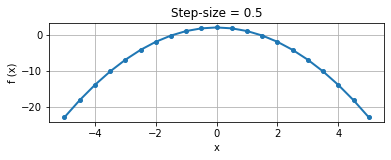

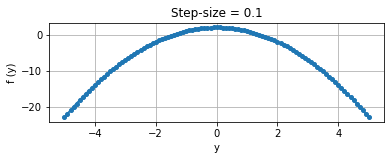

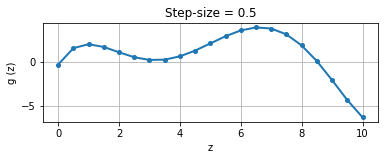

In [15]:
import matplotlib.pyplot as plt

# Print f(x), f(y), and g(z)

plt.figure(1)
plt.subplot(212)
plt.plot(x_, [f(x) for x in x_], '-', marker='o', markersize=4, lw=2)
plt.grid()
plt.xlabel('x')
plt.ylabel('f (x)')
plt.title('Step-size = 0.5')

plt.figure(2)
plt.subplot(212)
plt.grid()
plt.plot(y_, [f(y) for y in y_], '-', marker='o', markersize=4, lw=2)
plt.xlabel('y')
plt.ylabel('f (y)')
plt.title('Step-size = 0.1')

plt.figure(3)
plt.subplot(212)
plt.plot(z_, [g(z) for z in z_], '-', marker='o', markersize=4, lw=2)
plt.grid()
plt.xlabel('z')
plt.ylabel('g (z)')
plt.title('Step-size = 0.5')

plt.show() 


In [6]:
import random

def hill_climbing(x, function):
    ''' 
    Function: hill_climbing
    Goal: find a global maxima of x for a given f(x)
    Parmeters: x (discrete list of x floats with given step size), function(fucntion to apply to the algorithm)
    Return: steps (total number of steps to reach result), current(x value of global maxima) 
    '''
    print("Hill Climbing: ")

    current = random.choice(x)  #random initial value in the space x
    print("Initial state: x =", current)

    next = None
    next_l = x[0] # leftmost element
    next_r = x[-1] # rightmost element
    steps = 0

    plt.figure(1)
    plt.subplot(211)
    plt.grid()
    plt.plot(x, [function(x_) for x_ in x], '-') # print the function line

    while True:
        steps += 1
        # choose next
        if current != x[0]: 
            next_l = x[x.index(current) - 1]    # neighbor to the left
        if current != x[-1]:
            next_r = x[x.index(current) + 1]    # neighbor to the right

        if function(next_l) > function(next_r) :
            next = next_l
        else: 
            next = next_r 

        plt.plot(current , function(current), 'bo') # print each step
        # update current with the best state
        if function(current) < function(next):
            current = next
        else:
            plt.plot(current, function(current), 'r*', markersize=6) # print local max in red
            plt.show()
            break
            
    return steps, current

def random_restart_hill_climbing(x, function, restarts):
    ''' 
    Function: random_restart_hill_climbing
    Goal: find a global maxima of x for a given f(x)
    Parmeters: x (discrete list of x floats with given step size), function(fucntion to apply to the algorithm), restarts(how many times to randomly restart)
    Return: current(x value of global maxima), updates (total number of updates to reach result), 
    '''
    print("Random Restart Hill Climbing: ")
    current = random.choice(x)  #random initial value in the space x
    print("Initial state: x =", current)

    plt.figure(1)
    plt.subplot(211)
    plt.grid()
    plt.plot(current , function(current), 'bo') # print each step
    plt.plot(x, [function(x_) for x_ in x], '-') # print the fucntion line
    
    updates = 0
    while restarts > 0: 
        restarts -= 1
        next = random.choice(x)  #random value in the space x
        plt.plot(next , function(next), 'bo') # print each step

        # update current with the best state
        if function(current) < function(next):
            current = next
            updates += 1

    plt.plot(current, function(current), 'r*', markersize=6) # print local max in red  
    plt.show()
    return current, updates



Q1: The efficiency and correctness of the Hill Climbing algorithm is directly related to the random choice of the initial state. When comparing the Hill Climbing algorithm using the same function f(x) where the only difference is the step size, it is clear that starting from the same initial space, a smaller step slower the algorithm in finding the result. For example, if the initial state x = -5, with step size of 0.5 we can find the result in 11 steps, while with step-size of 0.1 we need 51 steps. 

Loop 1
a) Set x = [-5,5], f(x), step-size = 0.5
Hill Climbing: 
Initial state: x = -3.5


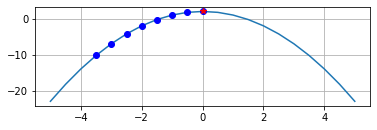

Global maxima is  0.0 found in 8 steps

b) Set x = [-5,5], f(x), step-size = 0.1
Hill Climbing: 
Initial state: x = 3.5


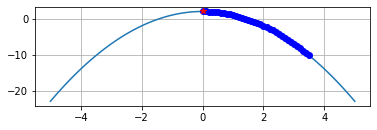

Global maxima is  -0.0 found in 36 steps

Loop 2
a) Set x = [-5,5], f(x), step-size = 0.5
Hill Climbing: 
Initial state: x = 5.0


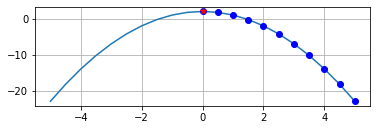

Global maxima is  0.0 found in 11 steps

b) Set x = [-5,5], f(x), step-size = 0.1
Hill Climbing: 
Initial state: x = -3.0


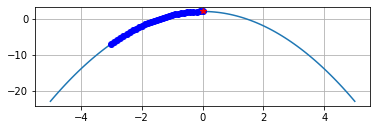

Global maxima is  -0.0 found in 31 steps

Loop 3
a) Set x = [-5,5], f(x), step-size = 0.5
Hill Climbing: 
Initial state: x = 0.5


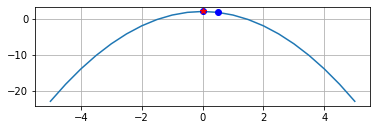

Global maxima is  0.0 found in 2 steps

b) Set x = [-5,5], f(x), step-size = 0.1
Hill Climbing: 
Initial state: x = 0.4


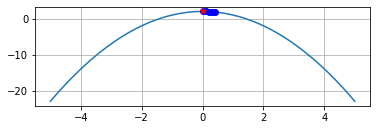

Global maxima is  -0.0 found in 5 steps

Loop 4
a) Set x = [-5,5], f(x), step-size = 0.5
Hill Climbing: 
Initial state: x = 4.5


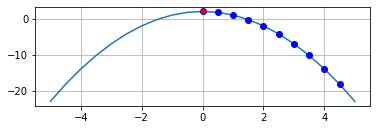

Global maxima is  0.0 found in 10 steps

b) Set x = [-5,5], f(x), step-size = 0.1
Hill Climbing: 
Initial state: x = -1.3


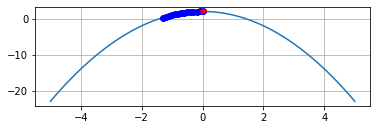

Global maxima is  -0.0 found in 14 steps

Loop 5
a) Set x = [-5,5], f(x), step-size = 0.5
Hill Climbing: 
Initial state: x = -3.5


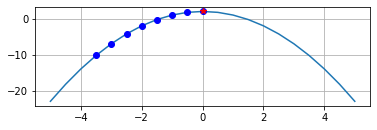

Global maxima is  0.0 found in 8 steps

b) Set x = [-5,5], f(x), step-size = 0.1
Hill Climbing: 
Initial state: x = 2.1


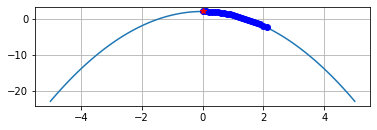

Global maxima is  -0.0 found in 22 steps

Loop 6
a) Set x = [-5,5], f(x), step-size = 0.5
Hill Climbing: 
Initial state: x = 4.5


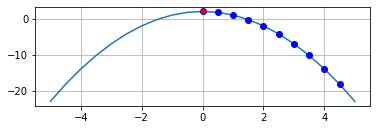

Global maxima is  0.0 found in 10 steps

b) Set x = [-5,5], f(x), step-size = 0.1
Hill Climbing: 
Initial state: x = -3.0


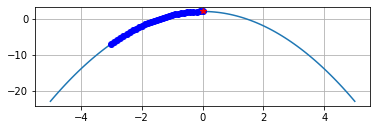

Global maxima is  -0.0 found in 31 steps

Loop 7
a) Set x = [-5,5], f(x), step-size = 0.5
Hill Climbing: 
Initial state: x = 1.0


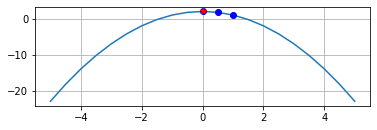

Global maxima is  0.0 found in 3 steps

b) Set x = [-5,5], f(x), step-size = 0.1
Hill Climbing: 
Initial state: x = 0.4


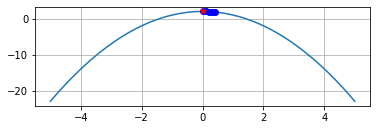

Global maxima is  -0.0 found in 5 steps

Loop 8
a) Set x = [-5,5], f(x), step-size = 0.5
Hill Climbing: 
Initial state: x = 1.5


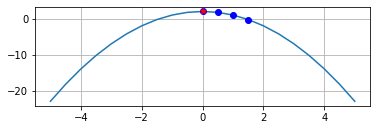

Global maxima is  0.0 found in 4 steps

b) Set x = [-5,5], f(x), step-size = 0.1
Hill Climbing: 
Initial state: x = -4.2


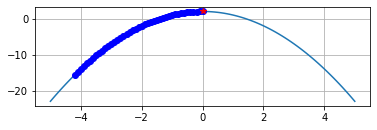

Global maxima is  -0.0 found in 43 steps

Loop 9
a) Set x = [-5,5], f(x), step-size = 0.5
Hill Climbing: 
Initial state: x = 1.0


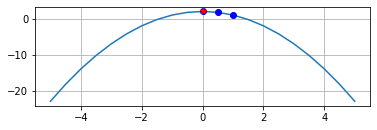

Global maxima is  0.0 found in 3 steps

b) Set x = [-5,5], f(x), step-size = 0.1
Hill Climbing: 
Initial state: x = 0.4


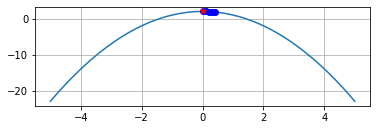

Global maxima is  -0.0 found in 5 steps



In [12]:
for num in range (1, 10): 
    print("Loop", num)
    print('a) Set x = [-5,5], f(x), step-size = 0.5')
    total_steps, max = hill_climbing(x_, f)
    print("Global maxima is ", max, "found in" , total_steps, "steps")
    print()
    print('b) Set x = [-5,5], f(x), step-size = 0.1')
    total_steps, max = hill_climbing(y_, f)
    print("Global maxima is ", max, "found in" , total_steps, "steps\n")

Q2: After runing the algorithms Random Restart Hill Climbing and Hill Climbing using the function g(x) for the set x = [0,10] with step-size of 0.5 for 100 times, both algorithms could find the global maxima of x = 6.5 most of the times (> 60%). Again, the effectivensess of the algorithms depends on the random choice of the initial state for the Hill Climbing - HC, or the random choices to update current for the Random Restart Hill Climbing - RRHC. When HC does not find the global maxima, it's because the algorithm gets stuck on the local maxima of x = 1. The RRHC does not get stuck on a local maxima, but it chooses the best option of the randomly selected 'next' it tests, which not always reaches the global maxima, but many times find a good result close to the maxima. It is not possible to assure which algorithm performs better with these tests, on each time I ran the program either HC, or RRHC would be more efficient on finding the global maxima.

Set x = [0,10] using g(x) with step-size = 0.5
Loop 1
a)
Random Restart Hill Climbing: 
Initial state: x = 2.5


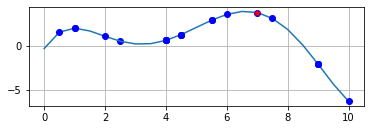

Local maxima x = 7.0 updates = 4

b)
Hill Climbing: 
Initial state: x = 5.0


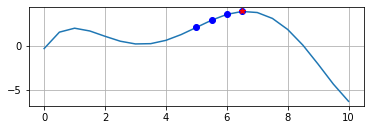

Local maxima x =  6.5 steps = 4 

Loop 2
a)
Random Restart Hill Climbing: 
Initial state: x = 9.5


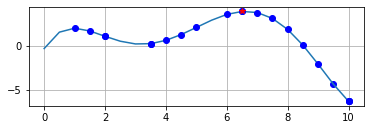

Local maxima x = 6.5 updates = 4

b)
Hill Climbing: 
Initial state: x = 1.5


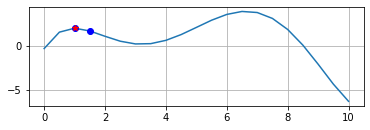

Local maxima x =  1.0 steps = 2 

Loop 3
a)
Random Restart Hill Climbing: 
Initial state: x = 9.0


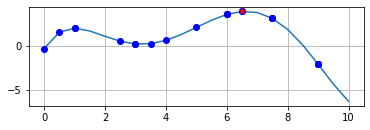

Local maxima x = 6.5 updates = 1

b)
Hill Climbing: 
Initial state: x = 0


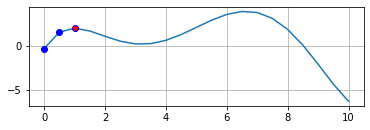

Local maxima x =  1.0 steps = 3 

Loop 4
a)
Random Restart Hill Climbing: 
Initial state: x = 1.5


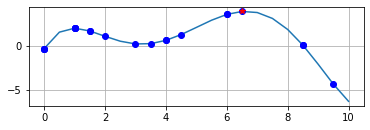

Local maxima x = 6.5 updates = 1

b)
Hill Climbing: 
Initial state: x = 5.5


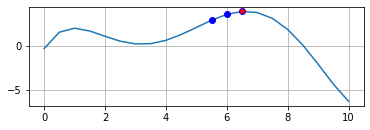

Local maxima x =  6.5 steps = 3 

Loop 5
a)
Random Restart Hill Climbing: 
Initial state: x = 1.0


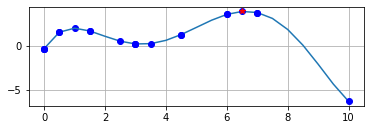

Local maxima x = 6.5 updates = 1

b)
Hill Climbing: 
Initial state: x = 10.0


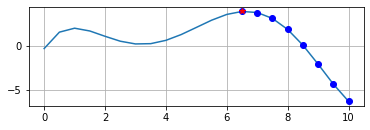

Local maxima x =  6.5 steps = 8 

Loop 6
a)
Random Restart Hill Climbing: 
Initial state: x = 2.5


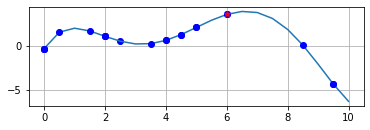

Local maxima x = 6.0 updates = 2

b)
Hill Climbing: 
Initial state: x = 8.0


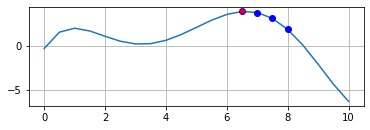

Local maxima x =  6.5 steps = 4 

Loop 7
a)
Random Restart Hill Climbing: 
Initial state: x = 3.0


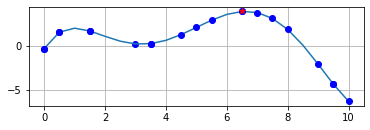

Local maxima x = 6.5 updates = 3

b)
Hill Climbing: 
Initial state: x = 8.0


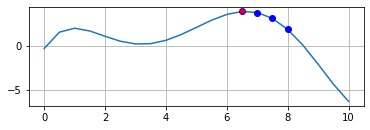

Local maxima x =  6.5 steps = 4 

Loop 8
a)
Random Restart Hill Climbing: 
Initial state: x = 1.0


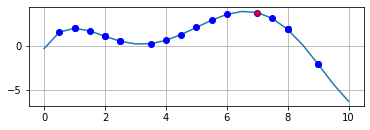

Local maxima x = 7.0 updates = 2

b)
Hill Climbing: 
Initial state: x = 2.0


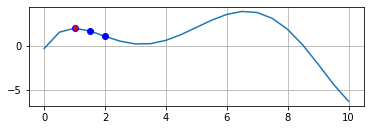

Local maxima x =  1.0 steps = 3 

Loop 9
a)
Random Restart Hill Climbing: 
Initial state: x = 5.0


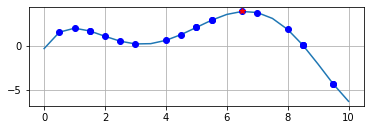

Local maxima x = 6.5 updates = 1

b)
Hill Climbing: 
Initial state: x = 8.0


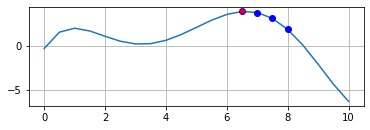

Local maxima x =  6.5 steps = 4 

Loop 10
a)
Random Restart Hill Climbing: 
Initial state: x = 9.0


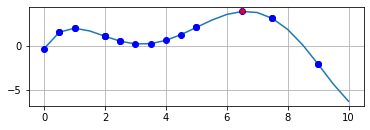

Local maxima x = 6.5 updates = 4

b)
Hill Climbing: 
Initial state: x = 1.5


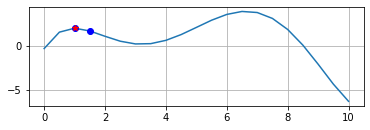

Local maxima x =  1.0 steps = 2 

Loop 11
a)
Random Restart Hill Climbing: 
Initial state: x = 0


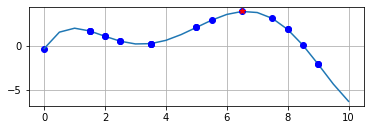

Local maxima x = 6.5 updates = 4

b)
Hill Climbing: 
Initial state: x = 0


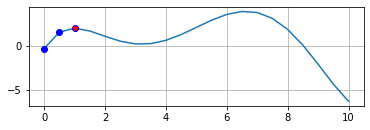

Local maxima x =  1.0 steps = 3 

Loop 12
a)
Random Restart Hill Climbing: 
Initial state: x = 8.5


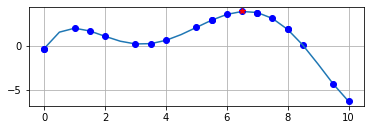

Local maxima x = 6.5 updates = 3

b)
Hill Climbing: 
Initial state: x = 2.0


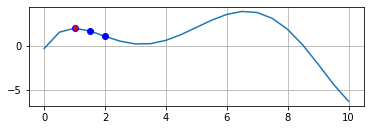

Local maxima x =  1.0 steps = 3 

Loop 13
a)
Random Restart Hill Climbing: 
Initial state: x = 8.5


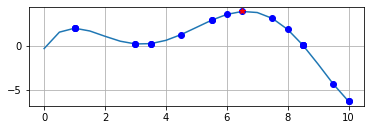

Local maxima x = 6.5 updates = 3

b)
Hill Climbing: 
Initial state: x = 8.0


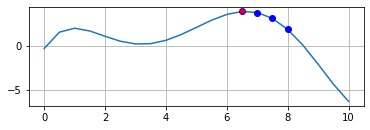

Local maxima x =  6.5 steps = 4 

Loop 14
a)
Random Restart Hill Climbing: 
Initial state: x = 1.0


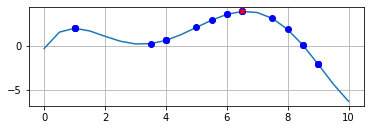

Local maxima x = 6.5 updates = 1

b)
Hill Climbing: 
Initial state: x = 1.0


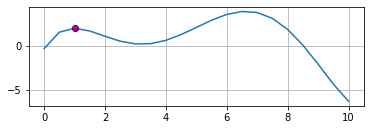

Local maxima x =  1.0 steps = 1 

Loop 15
a)
Random Restart Hill Climbing: 
Initial state: x = 6.0


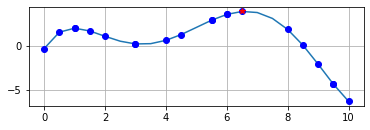

Local maxima x = 6.5 updates = 1

b)
Hill Climbing: 
Initial state: x = 3.0


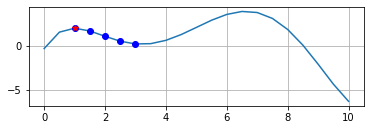

Local maxima x =  1.0 steps = 5 

Loop 16
a)
Random Restart Hill Climbing: 
Initial state: x = 1.0


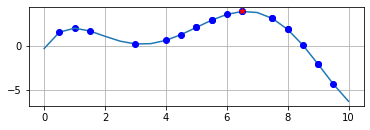

Local maxima x = 6.5 updates = 2

b)
Hill Climbing: 
Initial state: x = 9.5


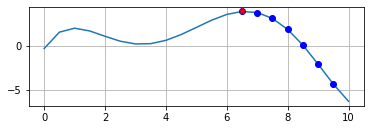

Local maxima x =  6.5 steps = 7 

Loop 17
a)
Random Restart Hill Climbing: 
Initial state: x = 7.0


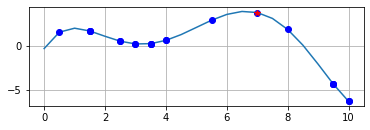

Local maxima x = 7.0 updates = 0

b)
Hill Climbing: 
Initial state: x = 2.5


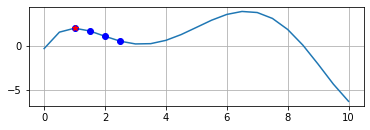

Local maxima x =  1.0 steps = 4 

Loop 18
a)
Random Restart Hill Climbing: 
Initial state: x = 7.5


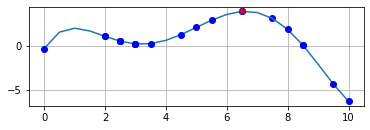

Local maxima x = 6.5 updates = 1

b)
Hill Climbing: 
Initial state: x = 9.5


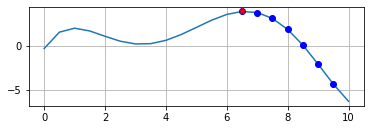

Local maxima x =  6.5 steps = 7 

Loop 19
a)
Random Restart Hill Climbing: 
Initial state: x = 9.5


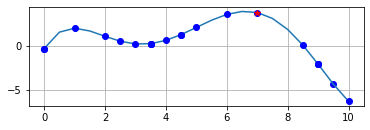

Local maxima x = 7.0 updates = 2

b)
Hill Climbing: 
Initial state: x = 7.5


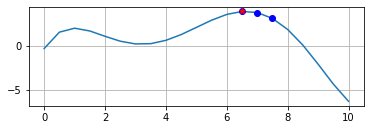

Local maxima x =  6.5 steps = 3 

Loop 20
a)
Random Restart Hill Climbing: 
Initial state: x = 5.5


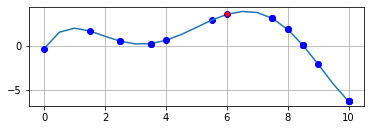

Local maxima x = 6.0 updates = 1

b)
Hill Climbing: 
Initial state: x = 3.5


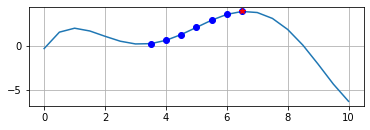

Local maxima x =  6.5 steps = 7 

Loop 21
a)
Random Restart Hill Climbing: 
Initial state: x = 5.5


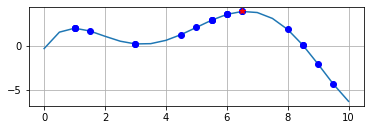

Local maxima x = 6.5 updates = 1

b)
Hill Climbing: 
Initial state: x = 6.0


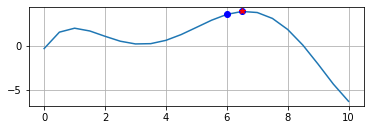

Local maxima x =  6.5 steps = 2 

Loop 22
a)
Random Restart Hill Climbing: 
Initial state: x = 5.5


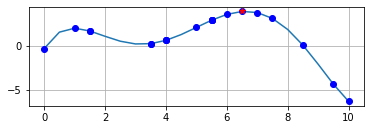

Local maxima x = 6.5 updates = 3

b)
Hill Climbing: 
Initial state: x = 1.5


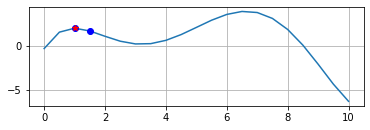

Local maxima x =  1.0 steps = 2 

Loop 23
a)
Random Restart Hill Climbing: 
Initial state: x = 2.0


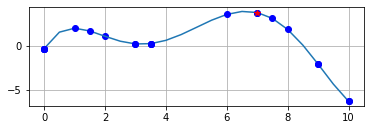

Local maxima x = 7.0 updates = 1

b)
Hill Climbing: 
Initial state: x = 8.0


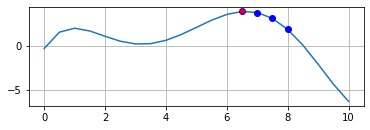

Local maxima x =  6.5 steps = 4 

Loop 24
a)
Random Restart Hill Climbing: 
Initial state: x = 1.5


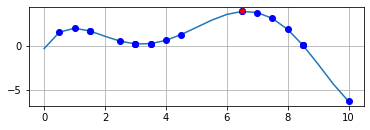

Local maxima x = 6.5 updates = 3

b)
Hill Climbing: 
Initial state: x = 5.0


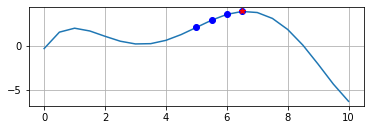

Local maxima x =  6.5 steps = 4 

Loop 25
a)
Random Restart Hill Climbing: 
Initial state: x = 2.5


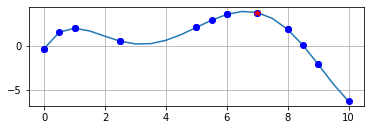

Local maxima x = 7.0 updates = 2

b)
Hill Climbing: 
Initial state: x = 1.5


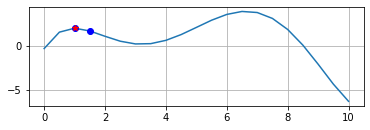

Local maxima x =  1.0 steps = 2 

Loop 26
a)
Random Restart Hill Climbing: 
Initial state: x = 5.5


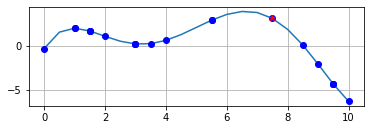

Local maxima x = 7.5 updates = 1

b)
Hill Climbing: 
Initial state: x = 9.5


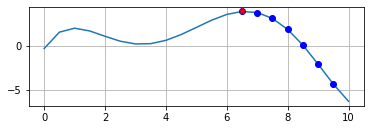

Local maxima x =  6.5 steps = 7 

Loop 27
a)
Random Restart Hill Climbing: 
Initial state: x = 4.5


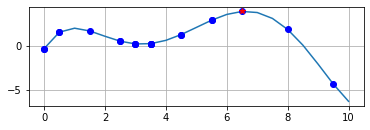

Local maxima x = 6.5 updates = 2

b)
Hill Climbing: 
Initial state: x = 0.5


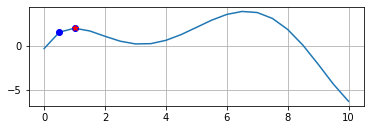

Local maxima x =  1.0 steps = 2 

Loop 28
a)
Random Restart Hill Climbing: 
Initial state: x = 0


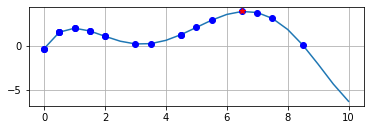

Local maxima x = 6.5 updates = 1

b)
Hill Climbing: 
Initial state: x = 3.5


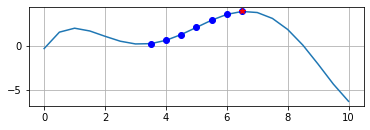

Local maxima x =  6.5 steps = 7 

Loop 29
a)
Random Restart Hill Climbing: 
Initial state: x = 3.0


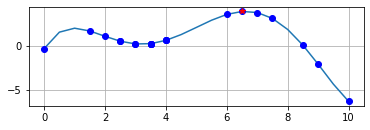

Local maxima x = 6.5 updates = 2

b)
Hill Climbing: 
Initial state: x = 1.5


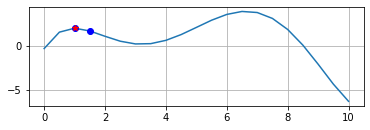

Local maxima x =  1.0 steps = 2 

Loop 30
a)
Random Restart Hill Climbing: 
Initial state: x = 2.5


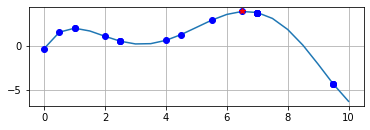

Local maxima x = 6.5 updates = 2

b)
Hill Climbing: 
Initial state: x = 4.0


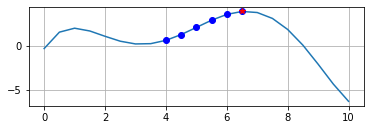

Local maxima x =  6.5 steps = 6 

Loop 31
a)
Random Restart Hill Climbing: 
Initial state: x = 7.5


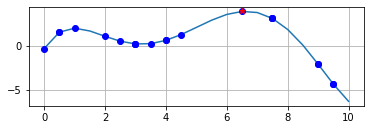

Local maxima x = 6.5 updates = 1

b)
Hill Climbing: 
Initial state: x = 8.0


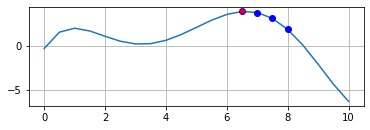

Local maxima x =  6.5 steps = 4 

Loop 32
a)
Random Restart Hill Climbing: 
Initial state: x = 5.0


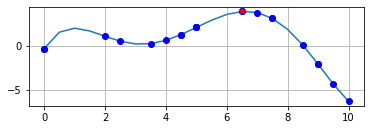

Local maxima x = 6.5 updates = 2

b)
Hill Climbing: 
Initial state: x = 3.5


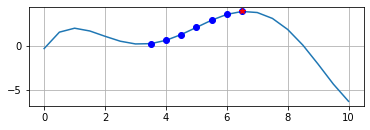

Local maxima x =  6.5 steps = 7 

Loop 33
a)
Random Restart Hill Climbing: 
Initial state: x = 5.0


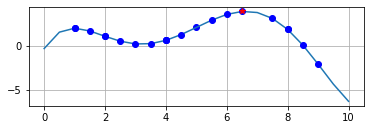

Local maxima x = 6.5 updates = 2

b)
Hill Climbing: 
Initial state: x = 2.5


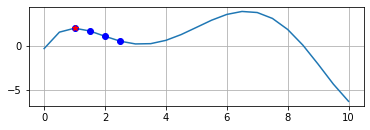

Local maxima x =  1.0 steps = 4 

Loop 34
a)
Random Restart Hill Climbing: 
Initial state: x = 6.0


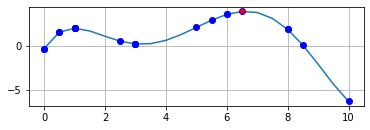

Local maxima x = 6.5 updates = 1

b)
Hill Climbing: 
Initial state: x = 10.0


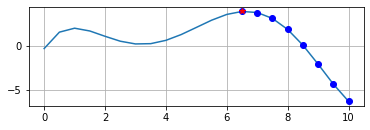

Local maxima x =  6.5 steps = 8 

Loop 35
a)
Random Restart Hill Climbing: 
Initial state: x = 1.5


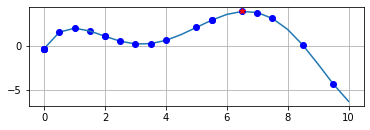

Local maxima x = 6.5 updates = 2

b)
Hill Climbing: 
Initial state: x = 9.5


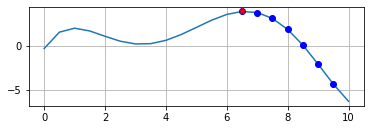

Local maxima x =  6.5 steps = 7 

Loop 36
a)
Random Restart Hill Climbing: 
Initial state: x = 1.5


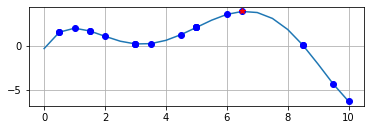

Local maxima x = 6.5 updates = 2

b)
Hill Climbing: 
Initial state: x = 9.0


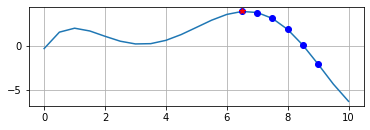

Local maxima x =  6.5 steps = 6 

Loop 37
a)
Random Restart Hill Climbing: 
Initial state: x = 5.5


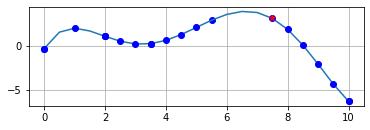

Local maxima x = 7.5 updates = 1

b)
Hill Climbing: 
Initial state: x = 2.5


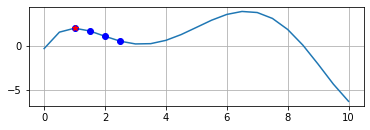

Local maxima x =  1.0 steps = 4 

Loop 38
a)
Random Restart Hill Climbing: 
Initial state: x = 5.0


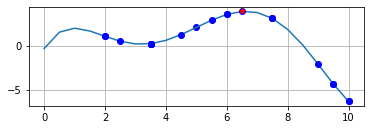

Local maxima x = 6.5 updates = 1

b)
Hill Climbing: 
Initial state: x = 9.0


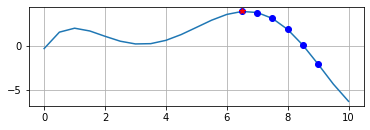

Local maxima x =  6.5 steps = 6 

Loop 39
a)
Random Restart Hill Climbing: 
Initial state: x = 9.5


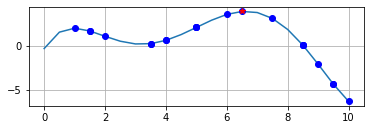

Local maxima x = 6.5 updates = 2

b)
Hill Climbing: 
Initial state: x = 8.5


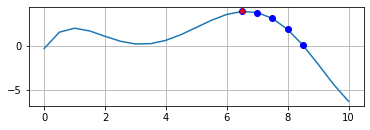

Local maxima x =  6.5 steps = 5 

Loop 40
a)
Random Restart Hill Climbing: 
Initial state: x = 6.5


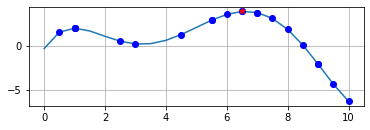

Local maxima x = 6.5 updates = 0

b)
Hill Climbing: 
Initial state: x = 9.0


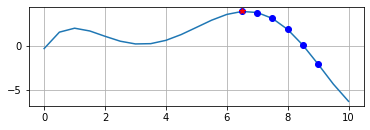

Local maxima x =  6.5 steps = 6 

Loop 41
a)
Random Restart Hill Climbing: 
Initial state: x = 5.0


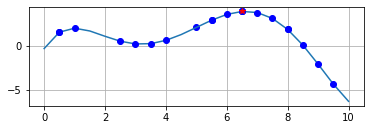

Local maxima x = 6.5 updates = 1

b)
Hill Climbing: 
Initial state: x = 0.5


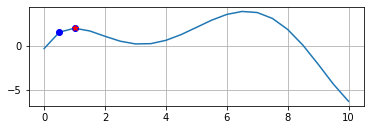

Local maxima x =  1.0 steps = 2 

Loop 42
a)
Random Restart Hill Climbing: 
Initial state: x = 5.0


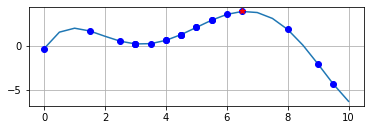

Local maxima x = 6.5 updates = 2

b)
Hill Climbing: 
Initial state: x = 0


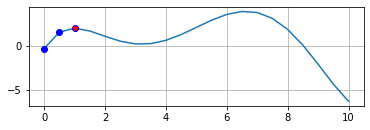

Local maxima x =  1.0 steps = 3 

Loop 43
a)
Random Restart Hill Climbing: 
Initial state: x = 7.0


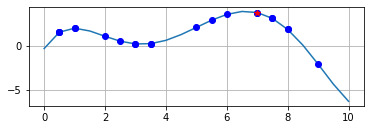

Local maxima x = 7.0 updates = 0

b)
Hill Climbing: 
Initial state: x = 3.5


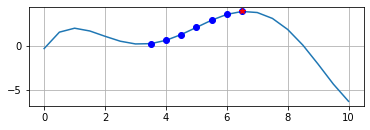

Local maxima x =  6.5 steps = 7 

Loop 44
a)
Random Restart Hill Climbing: 
Initial state: x = 1.0


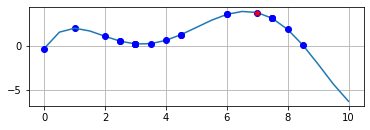

Local maxima x = 7.0 updates = 2

b)
Hill Climbing: 
Initial state: x = 1.0


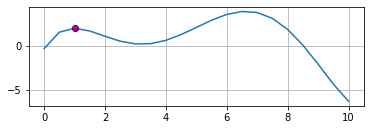

Local maxima x =  1.0 steps = 1 

Loop 45
a)
Random Restart Hill Climbing: 
Initial state: x = 2.0


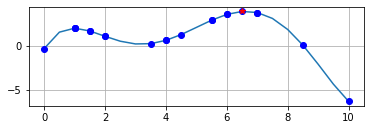

Local maxima x = 6.5 updates = 2

b)
Hill Climbing: 
Initial state: x = 9.0


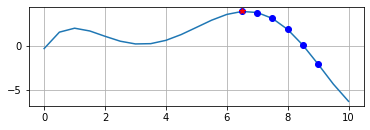

Local maxima x =  6.5 steps = 6 

Loop 46
a)
Random Restart Hill Climbing: 
Initial state: x = 9.5


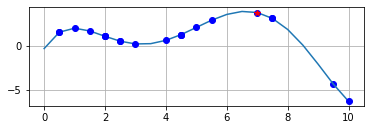

Local maxima x = 7.0 updates = 4

b)
Hill Climbing: 
Initial state: x = 7.5


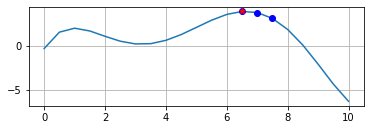

Local maxima x =  6.5 steps = 3 

Loop 47
a)
Random Restart Hill Climbing: 
Initial state: x = 2.0


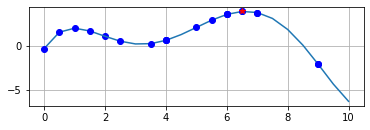

Local maxima x = 6.5 updates = 2

b)
Hill Climbing: 
Initial state: x = 5.5


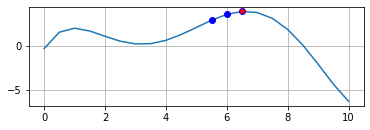

Local maxima x =  6.5 steps = 3 

Loop 48
a)
Random Restart Hill Climbing: 
Initial state: x = 9.5


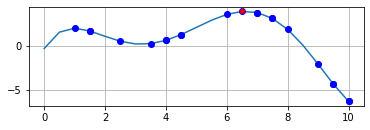

Local maxima x = 6.5 updates = 2

b)
Hill Climbing: 
Initial state: x = 6.0


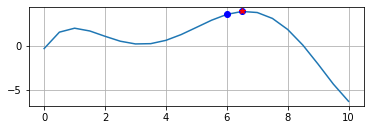

Local maxima x =  6.5 steps = 2 

Loop 49
a)
Random Restart Hill Climbing: 
Initial state: x = 9.0


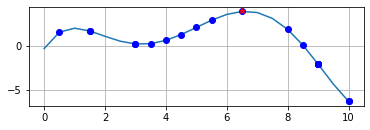

Local maxima x = 6.5 updates = 2

b)
Hill Climbing: 
Initial state: x = 5.5


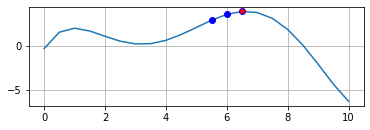

Local maxima x =  6.5 steps = 3 

Loop 50
a)
Random Restart Hill Climbing: 
Initial state: x = 4.5


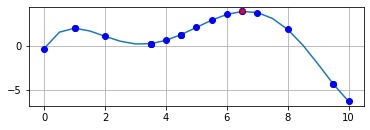

Local maxima x = 6.5 updates = 1

b)
Hill Climbing: 
Initial state: x = 6.0


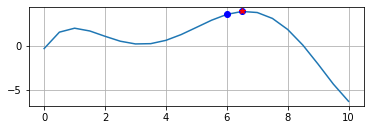

Local maxima x =  6.5 steps = 2 

Loop 51
a)
Random Restart Hill Climbing: 
Initial state: x = 4.5


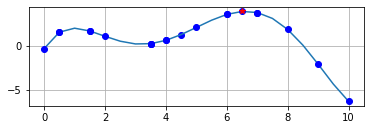

Local maxima x = 6.5 updates = 3

b)
Hill Climbing: 
Initial state: x = 3.0


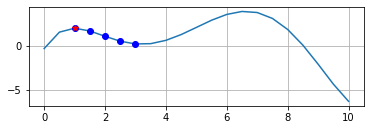

Local maxima x =  1.0 steps = 5 

Loop 52
a)
Random Restart Hill Climbing: 
Initial state: x = 9.0


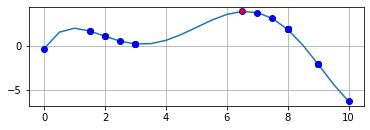

Local maxima x = 6.5 updates = 2

b)
Hill Climbing: 
Initial state: x = 4.0


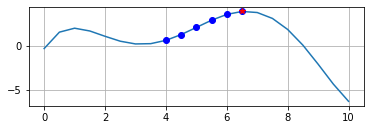

Local maxima x =  6.5 steps = 6 

Loop 53
a)
Random Restart Hill Climbing: 
Initial state: x = 8.5


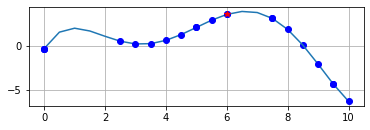

Local maxima x = 6.0 updates = 2

b)
Hill Climbing: 
Initial state: x = 3.5


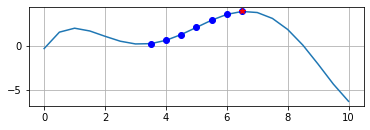

Local maxima x =  6.5 steps = 7 

Loop 54
a)
Random Restart Hill Climbing: 
Initial state: x = 3.0


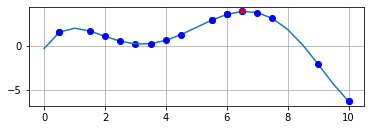

Local maxima x = 6.5 updates = 3

b)
Hill Climbing: 
Initial state: x = 0


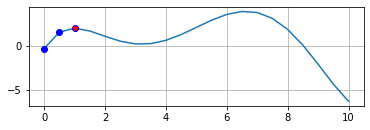

Local maxima x =  1.0 steps = 3 

Loop 55
a)
Random Restart Hill Climbing: 
Initial state: x = 3.5


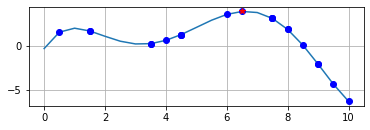

Local maxima x = 6.5 updates = 4

b)
Hill Climbing: 
Initial state: x = 0.5


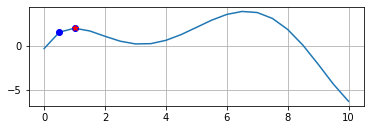

Local maxima x =  1.0 steps = 2 

Loop 56
a)
Random Restart Hill Climbing: 
Initial state: x = 2.5


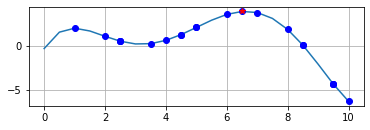

Local maxima x = 6.5 updates = 4

b)
Hill Climbing: 
Initial state: x = 3.5


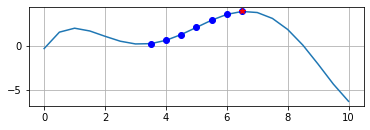

Local maxima x =  6.5 steps = 7 

Loop 57
a)
Random Restart Hill Climbing: 
Initial state: x = 9.0


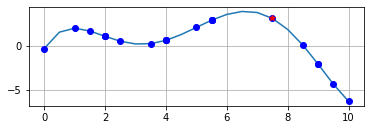

Local maxima x = 7.5 updates = 3

b)
Hill Climbing: 
Initial state: x = 10.0


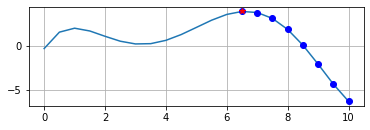

Local maxima x =  6.5 steps = 8 

Loop 58
a)
Random Restart Hill Climbing: 
Initial state: x = 4.0


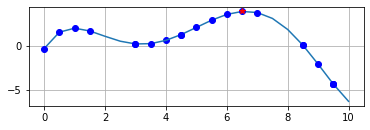

Local maxima x = 6.5 updates = 3

b)
Hill Climbing: 
Initial state: x = 4.5


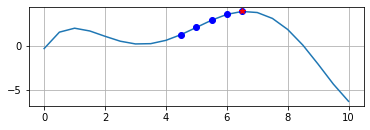

Local maxima x =  6.5 steps = 5 

Loop 59
a)
Random Restart Hill Climbing: 
Initial state: x = 6.0


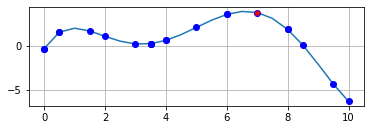

Local maxima x = 7.0 updates = 1

b)
Hill Climbing: 
Initial state: x = 8.0


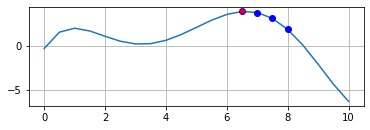

Local maxima x =  6.5 steps = 4 

Loop 60
a)
Random Restart Hill Climbing: 
Initial state: x = 3.5


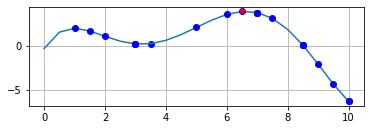

Local maxima x = 6.5 updates = 2

b)
Hill Climbing: 
Initial state: x = 0.5


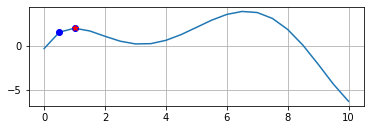

Local maxima x =  1.0 steps = 2 

Loop 61
a)
Random Restart Hill Climbing: 
Initial state: x = 9.0


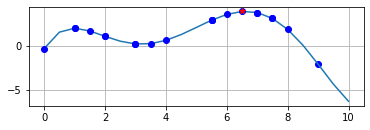

Local maxima x = 6.5 updates = 3

b)
Hill Climbing: 
Initial state: x = 4.5


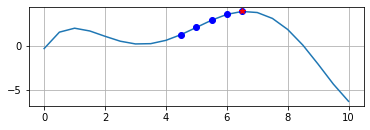

Local maxima x =  6.5 steps = 5 

Loop 62
a)
Random Restart Hill Climbing: 
Initial state: x = 4.0


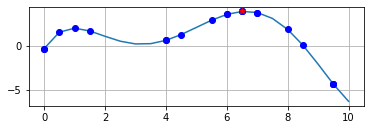

Local maxima x = 6.5 updates = 3

b)
Hill Climbing: 
Initial state: x = 2.5


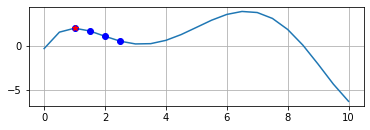

Local maxima x =  1.0 steps = 4 

Loop 63
a)
Random Restart Hill Climbing: 
Initial state: x = 4.0


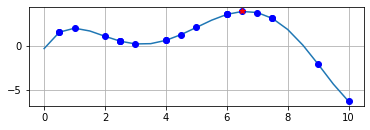

Local maxima x = 6.5 updates = 3

b)
Hill Climbing: 
Initial state: x = 2.5


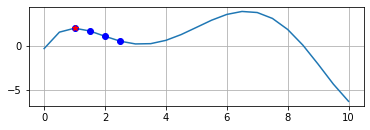

Local maxima x =  1.0 steps = 4 

Loop 64
a)
Random Restart Hill Climbing: 
Initial state: x = 6.0


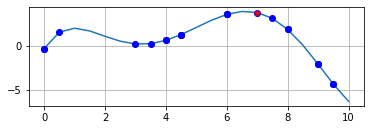

Local maxima x = 7.0 updates = 1

b)
Hill Climbing: 
Initial state: x = 5.5


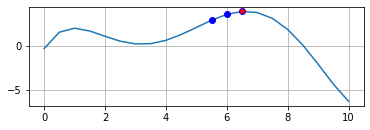

Local maxima x =  6.5 steps = 3 

Loop 65
a)
Random Restart Hill Climbing: 
Initial state: x = 3.0


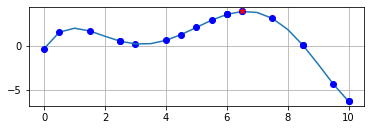

Local maxima x = 6.5 updates = 4

b)
Hill Climbing: 
Initial state: x = 1.5


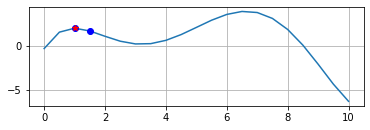

Local maxima x =  1.0 steps = 2 

Loop 66
a)
Random Restart Hill Climbing: 
Initial state: x = 6.5


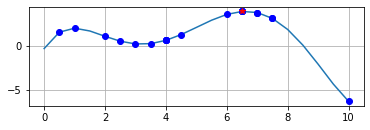

Local maxima x = 6.5 updates = 0

b)
Hill Climbing: 
Initial state: x = 0.5


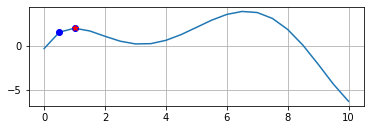

Local maxima x =  1.0 steps = 2 

Loop 67
a)
Random Restart Hill Climbing: 
Initial state: x = 4.0


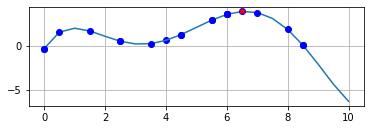

Local maxima x = 6.5 updates = 4

b)
Hill Climbing: 
Initial state: x = 2.5


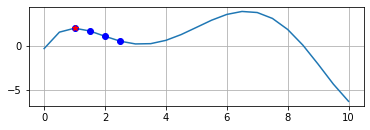

Local maxima x =  1.0 steps = 4 

Loop 68
a)
Random Restart Hill Climbing: 
Initial state: x = 7.5


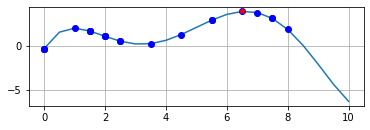

Local maxima x = 6.5 updates = 1

b)
Hill Climbing: 
Initial state: x = 5.5


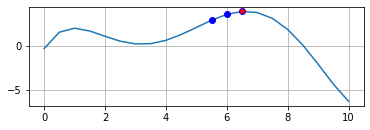

Local maxima x =  6.5 steps = 3 

Loop 69
a)
Random Restart Hill Climbing: 
Initial state: x = 6.0


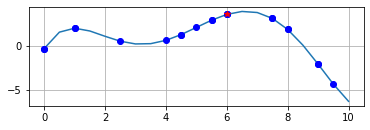

Local maxima x = 6.0 updates = 0

b)
Hill Climbing: 
Initial state: x = 0


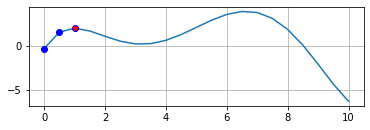

Local maxima x =  1.0 steps = 3 

Loop 70
a)
Random Restart Hill Climbing: 
Initial state: x = 9.0


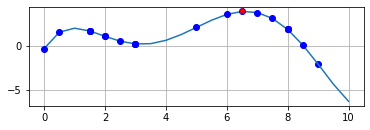

Local maxima x = 6.5 updates = 4

b)
Hill Climbing: 
Initial state: x = 7.0


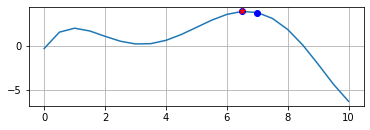

Local maxima x =  6.5 steps = 2 

Loop 71
a)
Random Restart Hill Climbing: 
Initial state: x = 3.5


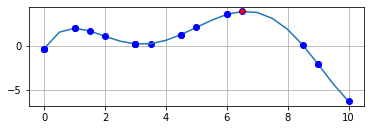

Local maxima x = 6.5 updates = 2

b)
Hill Climbing: 
Initial state: x = 7.0


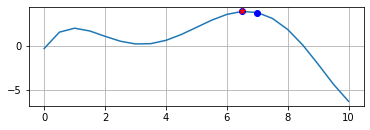

Local maxima x =  6.5 steps = 2 

Loop 72
a)
Random Restart Hill Climbing: 
Initial state: x = 9.5


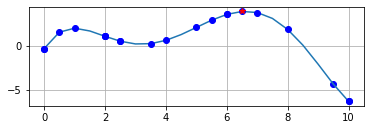

Local maxima x = 6.5 updates = 4

b)
Hill Climbing: 
Initial state: x = 3.5


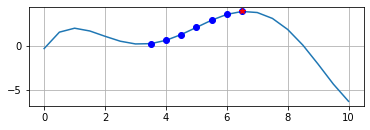

Local maxima x =  6.5 steps = 7 

Loop 73
a)
Random Restart Hill Climbing: 
Initial state: x = 1.0


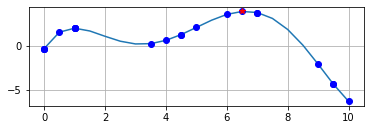

Local maxima x = 6.5 updates = 2

b)
Hill Climbing: 
Initial state: x = 2.5


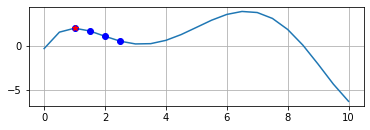

Local maxima x =  1.0 steps = 4 

Loop 74
a)
Random Restart Hill Climbing: 
Initial state: x = 5.0


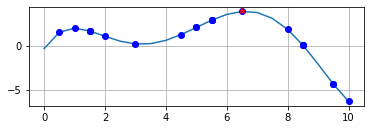

Local maxima x = 6.5 updates = 1

b)
Hill Climbing: 
Initial state: x = 8.5


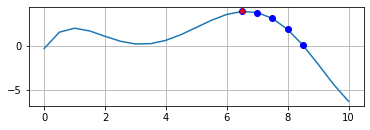

Local maxima x =  6.5 steps = 5 

Loop 75
a)
Random Restart Hill Climbing: 
Initial state: x = 8.5


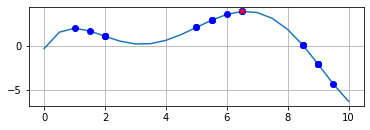

Local maxima x = 6.5 updates = 2

b)
Hill Climbing: 
Initial state: x = 9.5


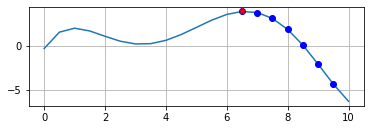

Local maxima x =  6.5 steps = 7 

Loop 76
a)
Random Restart Hill Climbing: 
Initial state: x = 8.5


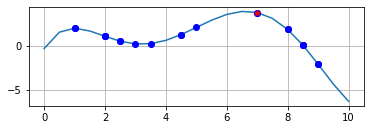

Local maxima x = 7.0 updates = 3

b)
Hill Climbing: 
Initial state: x = 6.0


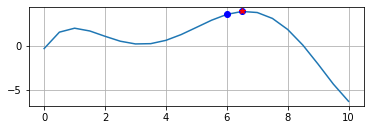

Local maxima x =  6.5 steps = 2 

Loop 77
a)
Random Restart Hill Climbing: 
Initial state: x = 6.0


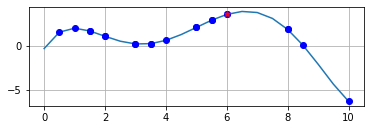

Local maxima x = 6.0 updates = 0

b)
Hill Climbing: 
Initial state: x = 8.0


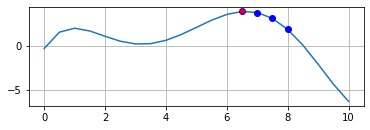

Local maxima x =  6.5 steps = 4 

Loop 78
a)
Random Restart Hill Climbing: 
Initial state: x = 3.5


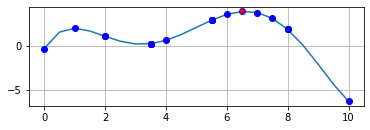

Local maxima x = 6.5 updates = 4

b)
Hill Climbing: 
Initial state: x = 6.0


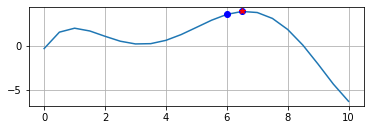

Local maxima x =  6.5 steps = 2 

Loop 79
a)
Random Restart Hill Climbing: 
Initial state: x = 2.0


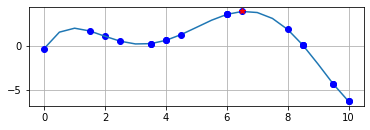

Local maxima x = 6.5 updates = 2

b)
Hill Climbing: 
Initial state: x = 2.5


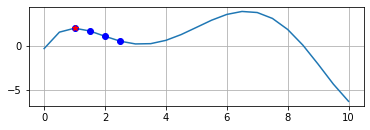

Local maxima x =  1.0 steps = 4 

Loop 80
a)
Random Restart Hill Climbing: 
Initial state: x = 10.0


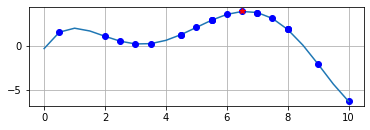

Local maxima x = 6.5 updates = 4

b)
Hill Climbing: 
Initial state: x = 2.5


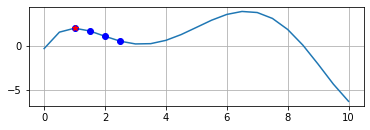

Local maxima x =  1.0 steps = 4 

Loop 81
a)
Random Restart Hill Climbing: 
Initial state: x = 4.5


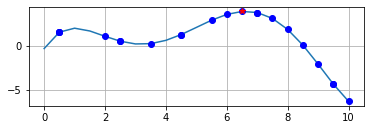

Local maxima x = 6.5 updates = 2

b)
Hill Climbing: 
Initial state: x = 5.0


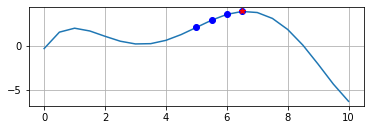

Local maxima x =  6.5 steps = 4 

Loop 82
a)
Random Restart Hill Climbing: 
Initial state: x = 4.0


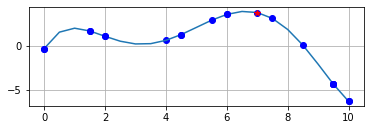

Local maxima x = 7.0 updates = 2

b)
Hill Climbing: 
Initial state: x = 6.5


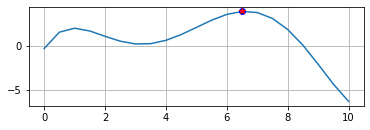

Local maxima x =  6.5 steps = 1 

Loop 83
a)
Random Restart Hill Climbing: 
Initial state: x = 8.0


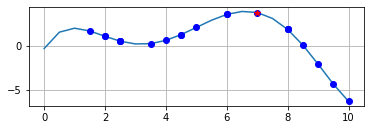

Local maxima x = 7.0 updates = 2

b)
Hill Climbing: 
Initial state: x = 3.0


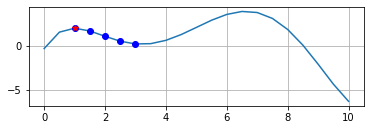

Local maxima x =  1.0 steps = 5 

Loop 84
a)
Random Restart Hill Climbing: 
Initial state: x = 3.0


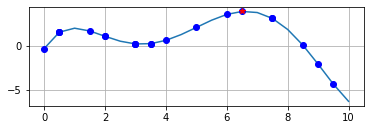

Local maxima x = 6.5 updates = 3

b)
Hill Climbing: 
Initial state: x = 1.5


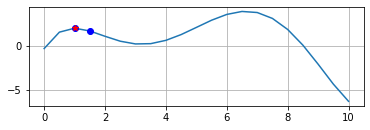

Local maxima x =  1.0 steps = 2 

Loop 85
a)
Random Restart Hill Climbing: 
Initial state: x = 0


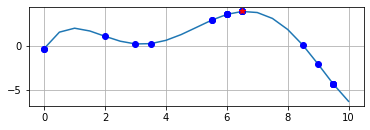

Local maxima x = 6.5 updates = 3

b)
Hill Climbing: 
Initial state: x = 2.0


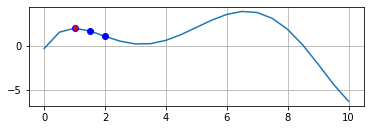

Local maxima x =  1.0 steps = 3 

Loop 86
a)
Random Restart Hill Climbing: 
Initial state: x = 10.0


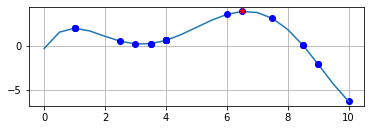

Local maxima x = 6.5 updates = 4

b)
Hill Climbing: 
Initial state: x = 10.0


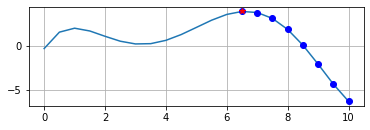

Local maxima x =  6.5 steps = 8 

Loop 87
a)
Random Restart Hill Climbing: 
Initial state: x = 0


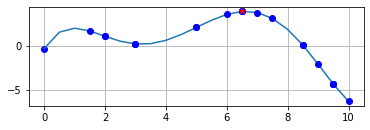

Local maxima x = 6.5 updates = 3

b)
Hill Climbing: 
Initial state: x = 1.0


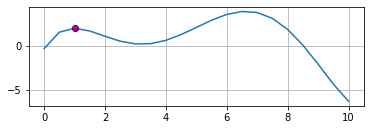

Local maxima x =  1.0 steps = 1 

Loop 88
a)
Random Restart Hill Climbing: 
Initial state: x = 5.5


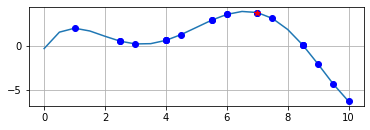

Local maxima x = 7.0 updates = 1

b)
Hill Climbing: 
Initial state: x = 4.0


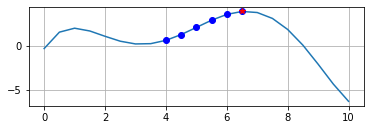

Local maxima x =  6.5 steps = 6 

Loop 89
a)
Random Restart Hill Climbing: 
Initial state: x = 1.0


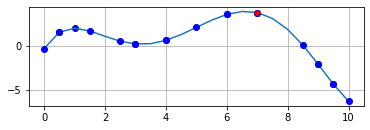

Local maxima x = 7.0 updates = 2

b)
Hill Climbing: 
Initial state: x = 6.5


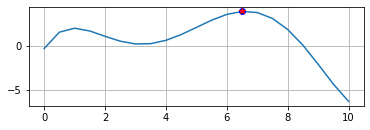

Local maxima x =  6.5 steps = 1 

Loop 90
a)
Random Restart Hill Climbing: 
Initial state: x = 7.5


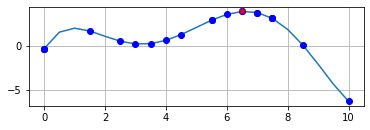

Local maxima x = 6.5 updates = 3

b)
Hill Climbing: 
Initial state: x = 5.5


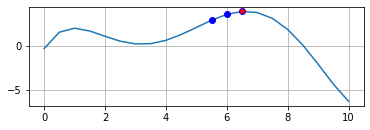

Local maxima x =  6.5 steps = 3 

Loop 91
a)
Random Restart Hill Climbing: 
Initial state: x = 1.5


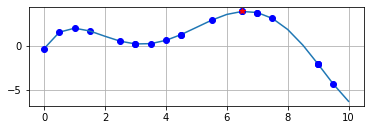

Local maxima x = 6.5 updates = 2

b)
Hill Climbing: 
Initial state: x = 4.0


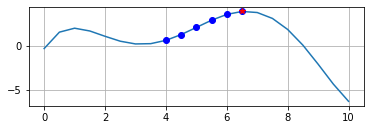

Local maxima x =  6.5 steps = 6 

Loop 92
a)
Random Restart Hill Climbing: 
Initial state: x = 4.0


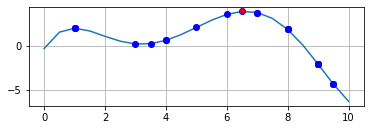

Local maxima x = 6.5 updates = 2

b)
Hill Climbing: 
Initial state: x = 4.0


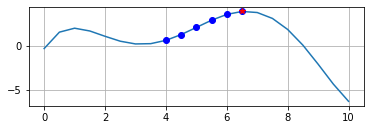

Local maxima x =  6.5 steps = 6 

Loop 93
a)
Random Restart Hill Climbing: 
Initial state: x = 8.5


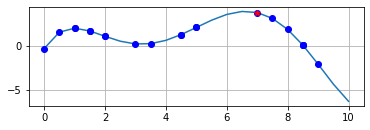

Local maxima x = 7.0 updates = 3

b)
Hill Climbing: 
Initial state: x = 7.5


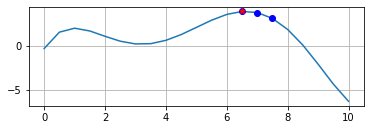

Local maxima x =  6.5 steps = 3 

Loop 94
a)
Random Restart Hill Climbing: 
Initial state: x = 6.5


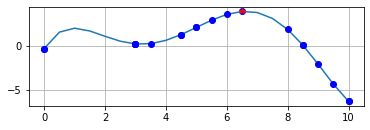

Local maxima x = 6.5 updates = 0

b)
Hill Climbing: 
Initial state: x = 10.0


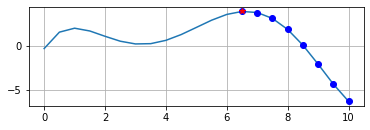

Local maxima x =  6.5 steps = 8 

Loop 95
a)
Random Restart Hill Climbing: 
Initial state: x = 0


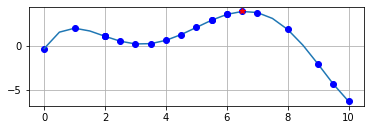

Local maxima x = 6.5 updates = 2

b)
Hill Climbing: 
Initial state: x = 5.0


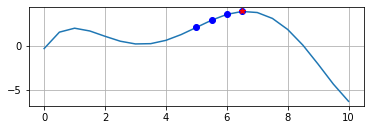

Local maxima x =  6.5 steps = 4 

Loop 96
a)
Random Restart Hill Climbing: 
Initial state: x = 5.5


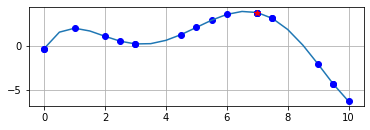

Local maxima x = 7.0 updates = 1

b)
Hill Climbing: 
Initial state: x = 8.0


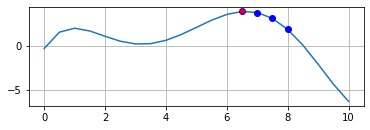

Local maxima x =  6.5 steps = 4 

Loop 97
a)
Random Restart Hill Climbing: 
Initial state: x = 3.5


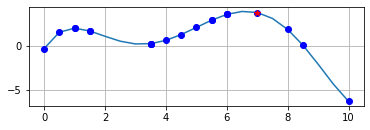

Local maxima x = 7.0 updates = 3

b)
Hill Climbing: 
Initial state: x = 6.5


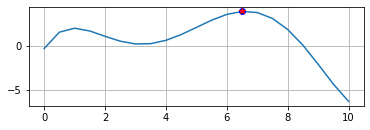

Local maxima x =  6.5 steps = 1 

Loop 98
a)
Random Restart Hill Climbing: 
Initial state: x = 9.5


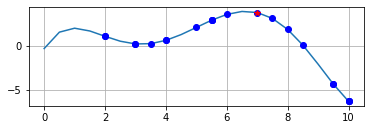

Local maxima x = 7.0 updates = 5

b)
Hill Climbing: 
Initial state: x = 4.5


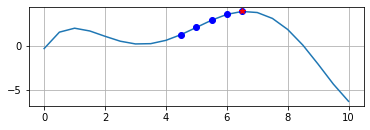

Local maxima x =  6.5 steps = 5 

Loop 99
a)
Random Restart Hill Climbing: 
Initial state: x = 8.0


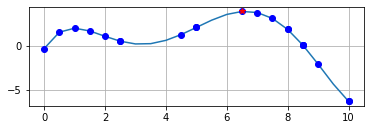

Local maxima x = 6.5 updates = 1

b)
Hill Climbing: 
Initial state: x = 6.0


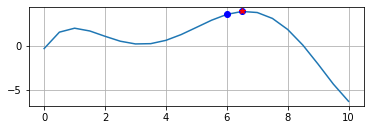

Local maxima x =  6.5 steps = 2 

Loop 100
a)
Random Restart Hill Climbing: 
Initial state: x = 7.5


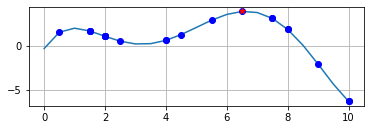

Local maxima x = 6.5 updates = 1

b)
Hill Climbing: 
Initial state: x = 7.5


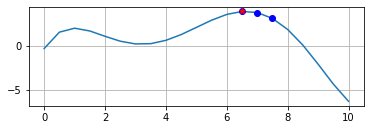

Local maxima x =  6.5 steps = 3 

After  100 iterations, RRHC found the global maxima  72 times with 20 restarts.
After  100 iterations, HC found the global maxima  65 times with an average of 4.06 steps.


In [14]:
print('Set x = [0,10] using g(x) with step-size = 0.5')
global_max_rrhc = 0
global_max_hc = 0
average_steps_hc = 0
repeat = 100
for num in range (0, repeat): 
    print("Loop", num+1)
    print('a)')
    result, updates = random_restart_hill_climbing(z_, g, 20)
    print("Local maxima x =", result, "updates =", updates)
    if result == 6.5: 
        global_max_rrhc += 1
    print('\nb)')
    total_steps, max = hill_climbing(z_, g)
    average_steps_hc += total_steps
    print("Local maxima x = ", max, "steps =" , total_steps, "\n")
    if max == 6.5:
        global_max_hc += 1

average_steps_hc /= repeat
print ("After ", repeat, "iterations, RRHC found the global maxima ",global_max_rrhc, "times with 20 restarts." )
print ("After ", repeat, "iterations, HC found the global maxima ",global_max_hc, "times with an average of", average_steps_hc, "steps." )